# AB Testing Website -> Classroom time¶
Website and Groups
A website has two versions (old and new).
The control group viewed the old website.
The experiment group viewed the new website.

<strong>Metric</strong><br>
The data provided contains the classroom time for the control group and the experiment group. The metric used in order to determine which website is better is the average classroom time per user.


<strong>Objective</strong><br>
The objective is to check if the new website should be adopted based on average classroom time.

<strong>Hypothesis</strong><br>
H0: ctr_group_experiment_mean - ctr_group_control_mean <= 0 <br>
H1: ctr_group_experiment_mean - ctr_group_control_mean > 0

<strong>Steps that need to happen:</strong><br>
1. We computed the <strong>observed difference</strong> between the metric, average classroom time, for the control and experiment group.<br>
2. We <strong>simulated the sampling distribution</strong> for the difference in proportions (or difference in click through rates). This is done by making use of bootstrapping.<br>
3. We used this sampling distribution to <strong>simulate the distribution under the null hypothesis</strong>, by creating a random normal distribution centered at 0 with the same spread and size.<br>
4. We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.<br>
5. We used this p-value to determine the statistical significance of our observed difference.<br>

## 0. Explore data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [62]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


## 1. Computed the observed difference

In [63]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
df_control = df[df['group'] == 'control']
control_mean = df_control['total_days'].mean()
control_mean

73.36899038461539

In [64]:
# get the average classroom time for experiment group
df_experiment = df[df['group'] == 'experiment']
experiment_mean = df_experiment['total_days'].mean()
experiment_mean

74.6715935334873

In [65]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

## 2. Simulated the sampling distribution

In [66]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    
    # get sample
    df_sample = df.sample(df.shape[0], replace = True)
    
    # control mean
    df_control = df_sample[df_sample['group'] == 'control']
#     df_control = df_control.groupby(['id']).mean()
    control_mean = df_control['total_days'].mean()
    
    # experiment mean
    df_experiment = df_sample[df_sample['group'] == 'experiment']
#     df_experiment = df_experiment.groupby(['id']).mean()
    experiment_mean = df_experiment['total_days'].mean()
    
    iobs_diff = experiment_mean - control_mean
        
    diffs.append(iobs_diff)
        


In [67]:
# convert to numpy array
diffs = np.array(diffs)
diffs.std()

0.733871965268511

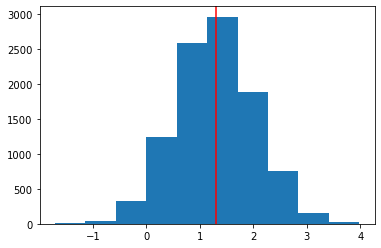

In [68]:
# plot sampling distribution
plt.hist(diffs);
plt.axvline(x=obs_diff, color='red');

## 3. Simulate the distribution under the null hypothesis

In [69]:
# simulate distribution under the null hypothesis
# null_vals = np.random.normal?
null_vals = np.random.normal(0, diffs.std(), diffs.size)

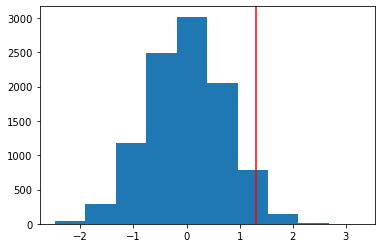

In [70]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff, color='red');

In [71]:
# compute p value
p_value = (null_vals > obs_diff).mean()
p_value

0.0384

In [72]:
if p_value < 0.05:
    print('reject H0')
else:
    print('fail to reject H0')

reject H0
